In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
sns.set_style('whitegrid')


<ipython-input-5-59337e125c9d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['benign_0__mal_1'],palette='Set2');


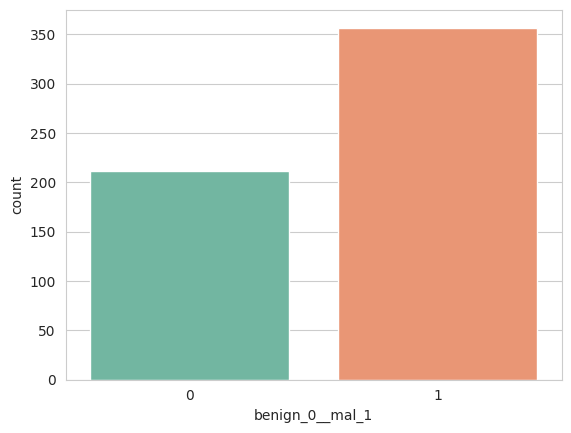

In [ ]:
sns.countplot(x=df['benign_0__mal_1'],palette='Set2');

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [ ]:
X.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((455, 30), (114, 30))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()
model.add(Dense(30,activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))

model.add(Dense(100,activation='tanh'))

model.add(Dense(100,activation='silu'))

model.add(Dense(100,activation='tanh'))

model.add(Dense(100,activation='elu'))

model.add(Dense(100,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
455/32

14.21875

In [ ]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.6703 - loss: 1.1847 - val_accuracy: 0.8772 - val_loss: 0.8983
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9173 - loss: 0.8097 - val_accuracy: 0.9298 - val_loss: 0.6603
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9360 - loss: 0.6397 - val_accuracy: 0.9474 - val_loss: 0.5997
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.5994 - val_accuracy: 0.9561 - val_loss: 0.5349
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9705 - loss: 0.5165 - val_accuracy: 0.9561 - val_loss: 0.4950
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.4962 - val_accuracy: 0.9649 - val_loss: 0.4918
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.4882 - val_accuracy: 0.9825 - val_loss: 0.4384
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.4509 - val_accuracy: 0.9825 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,595 (521.86 KB)

 Trainable params: 44,531 (173.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,064 (347.91 KB)

In [ ]:
model.weights

[<KerasVariable shape=(30, 30), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(30, 100), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_1/bias>,
 <KerasVariable shape=(100, 100), dtype=float32, path=sequential/dense_2/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_2/bias>,
 <KerasVariable shape=(100, 100), dtype=float32, path=sequential/dense_3/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_3/bias>,
 <KerasVariable shape=(100, 100), dtype=float32, path=sequential/dense_4/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_4/bias>,
 <KerasVariable shape=(100, 100), dtype=float32, path=sequential/dense_5/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_5/bias>,
 <KerasVariable shape=(100, 1), dtype=float32, path=sequenti

In [ ]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>]

<Axes: >

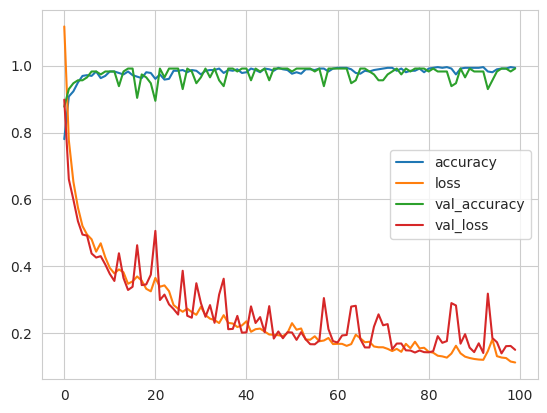

In [ ]:
Results=pd.DataFrame(model.history.history)
Results.plot()

<Axes: >

<Figure size 1200x600 with 0 Axes>

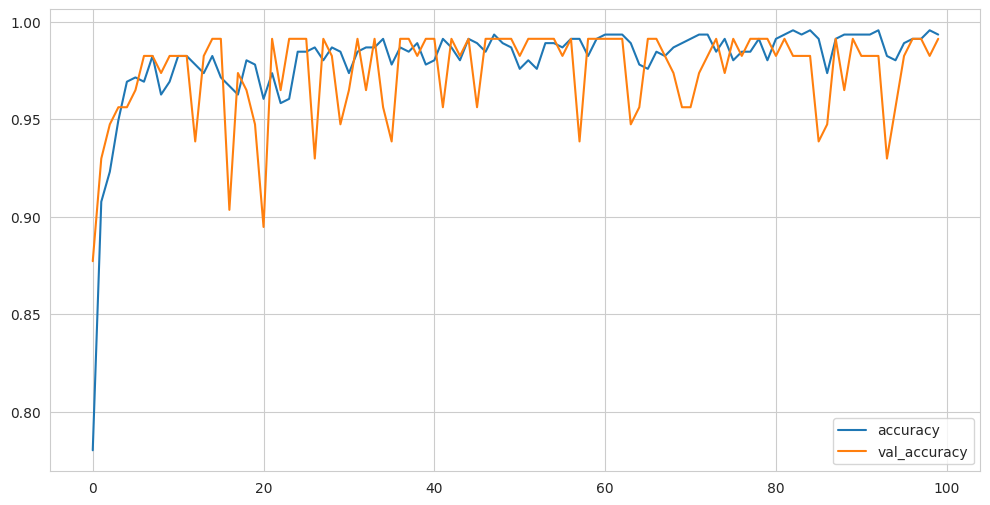

In [ ]:
plt.figure(figsize=(12,6))
Results[['accuracy','val_accuracy']].plot(figsize=(12,6))


<Axes: >

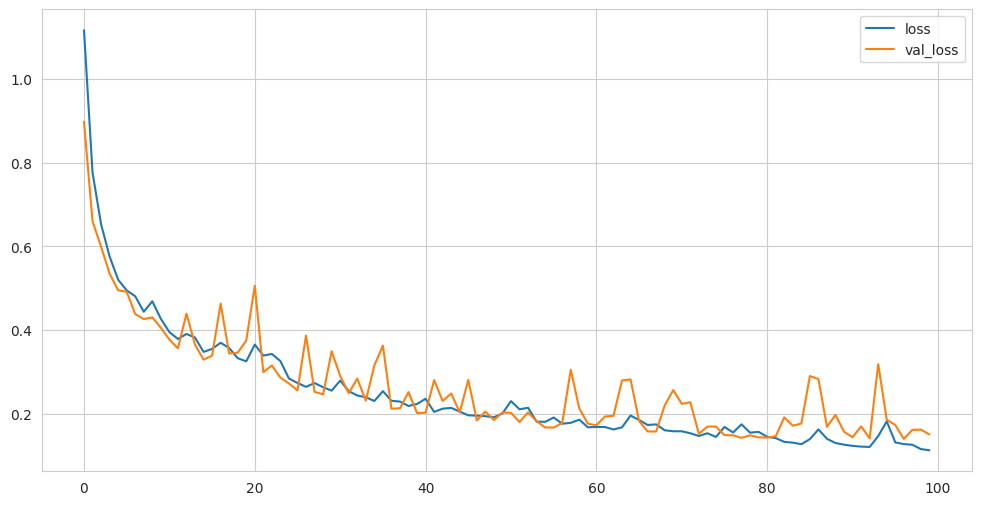

In [ ]:
Results[['loss','val_loss']].plot(figsize=(12,6))


In [ ]:
model.evaluate(x=X_test,y=y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9850 - loss: 0.1700 


[0.15045815706253052, 0.9912280440330505]

In [ ]:
model.save('cancer_classification.h5')

In [ ]:
model.save('my_model_cancer.keras')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=(model.predict(X_test) >0.5).astype('int32')
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
predictions.shape,y_test.shape

((114, 1), (114,))

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm

array([[42,  0],
       [ 1, 71]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

